<a href="https://colab.research.google.com/github/Mayshro/Logistic_Regression_Project/blob/main/Logistic_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [271]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)



```
Section I : Data Loading


Part I : Load the dataset into the notebook

In [272]:
data_path = '/content/drive/MyDrive/portu_banking_final.csv'

In [273]:
data = pd.read_csv(data_path)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [274]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


Part II : Explore and make note of Attribute Information from UCI

**Input** variables

1.age (numeric)

2. job: type of job( type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4.  education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5.  default: has credit in default?
    (categorical: 'no','yes','unknown')

6.  housing: has housing loan? 
    (categorical: 'no','yes','unknown')

7. loan: has personal loan? 
   (categorical: 'no','yes','unknown')

8.  contact: contact communication type 
    (categorical: 'cellular','telephone')

9. month: last contact month of year
   (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri') 

11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14. previous:number of contacts performed before this campaign and for this client (numeric)

15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16. emp.var.rate: employment variation rate - (numeric)

17. cons.price.idx: consumer price index - (numeric)

18.cons.conf.idx: consumer confidence index - (numeric)

19. euribor3m: euribor 3 month rate - (numeric)

20. nr.employed: number of employees - (numeric)



Part III : What is the significance of the y column in the dataset and what are the value counts of the y column?

 y - has the client subscribed a term deposit? (binary: 'yes','no')



In [275]:
data['y'].value_counts()


0    36548
1     4640
Name: y, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


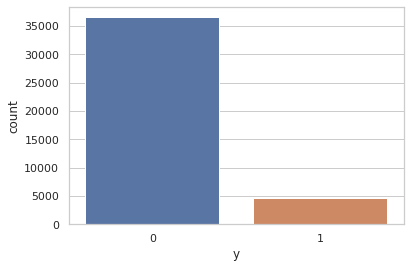

<Figure size 432x288 with 0 Axes>

In [276]:
sns.countplot(data['y'])
plt.show()
plt.savefig('count_plot')

Part IV : What is the ratio of the two classes ? Are they balanced ?

In [277]:
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription" , pct_of_sub*100)

percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


#Data is imbalanced. lets do some exploration

In [278]:
data.groupby('y').mean()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,
0,220.844807,2.633085,985.345135,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


Observations:

1. The average age of customers who bought the term deposit is higher than that of customers who didnot.

2. The pdays are lowe and as the pdays are lower better the memory of last calland hence the better chances of a sale.

3. Calls made during campaign are lower for customers who bought the term deposit.

# Calculate the caterorical mean s for other categorical variables such as education and marital statusto get more detailed sense of our data.

In [279]:
data.groupby('job').mean()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,
ADMIN.,637.000000,1.500000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.858500,5191.000000,0.000000
BLUE-COLLAR,5.000000,7.000000,999.000000,1.000000,-1.800000,92.893000,-46.200000,1.281000,5099.100000,0.000000
HOUSEMAID,84.000000,1.000000,999.000000,0.000000,-0.100000,93.200000,-42.000000,4.153000,5195.800000,0.000000
MANAGEMENT,1225.000000,2.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.884000,5076.200000,0.000000
RETIRED,545.000000,1.666667,668.000000,1.000000,-1.566667,93.142667,-37.233333,1.976667,5087.866667,0.333333
SERVICES,238.333333,2.000000,999.000000,0.000000,1.200000,94.151000,-38.200000,4.892000,5203.366667,0.000000
STUDENT,638.500000,1.500000,505.500000,0.500000,-1.750000,94.045500,-40.150000,0.752500,5000.150000,1.000000
TECHNICIAN,834.000000,9.000000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.855000,5191.000000,0.000000
UNKNOWN,54.000000,4.000000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.864000,5191.000000,0.000000


In [280]:
data.groupby('marital').mean()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,
D,87.500000,1.250000,999.000000,0.000000,1.250000,93.974250,-37.675000,4.909750,5209.550000,0.000000
M,418.400000,2.600000,999.000000,0.200000,-0.960000,92.931400,-37.560000,2.589200,5141.540000,0.000000
S,283.333333,2.000000,999.000000,0.000000,-0.233333,93.396333,-34.733333,3.531333,5152.733333,0.000000
divorced,253.934679,2.614583,968.613498,0.168837,0.163043,93.606244,-40.709701,3.714567,5170.845074,0.103299
married,257.406332,2.572804,967.963528,0.155599,0.183854,93.597501,-40.271203,3.746064,5171.854853,0.101593
single,261.518720,2.533939,952.231474,0.211414,-0.167972,93.517331,-40.920303,3.317391,5155.199905,0.140078
unknown,312.725000,3.187500,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [281]:
data.groupby('education').mean()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,
basic-4y,259.750000,4.250000,915.916667,0.250000,0.166667,93.747500,-42.225000,3.615083,5167.266667,0.083333
basic-6y,222.500000,2.500000,999.000000,0.000000,0.766667,93.784667,-39.933333,4.313333,5194.233333,0.000000
basic-9y,144.900000,1.600000,999.000000,0.200000,0.270000,93.732300,-42.120000,3.716900,5161.490000,0.000000
basic.4y,264.842459,2.595821,970.171230,0.146734,0.216066,93.658052,-40.234150,3.752162,5170.133117,0.102546
basic.6y,264.524497,2.556430,980.319335,0.129484,0.229746,93.649709,-41.131015,3.771524,5174.666842,0.082240
basic.9y,261.484673,2.533886,979.100249,0.141342,0.159056,93.623218,-41.325435,3.697932,5172.311914,0.078376
high.school,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,252.533855,2.586115,962.482548,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485


Ratio output not getting

Section II : Data Cleaning

Part I : Get the dtypes of all the columns of our dataset

In [282]:
data.dtypes

age                object
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [283]:
data["job"].value_counts()

admin.           10420
blue-collar       9253
technician        6742
services          3966
management        2923
retired           1717
entrepreneur      1456
self-employed     1421
housemaid         1059
unemployed        1014
student            873
unknown            329
RETIRED              3
SERVICES             3
STUDENT              2
ADMIN.               2
MANAGEMENT           1
TECHNICIAN           1
BLUE-COLLAR          1
HOUSEMAID            1
UNKNOWN              1
Name: job, dtype: int64

Part II : Refering to the UCI data description , explore the data in your columns and check if there are any errors

In [284]:
data.age.unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '35-30', '25', '57', '63', '58', '60', '30-35', '64', '51',
       '23', '20', '74', '80', '61', '25-30', '62', '75', '21', '82',
       '77', '18-25', '30-32', '70', '50-55', '76', '73', '66', '22',
       '71', '19', '79', '88', '65', '67', '81', '18', '84', '69', '98',
       '85', '83', '78', '92', '45-50', '20-25', '20-40', '35-40', '86',
       '94', '17', '91', '89', '87', '95', '30-40', 56, 39, 30, 53, 37,
       22, 45, 31, 24, 50, 58, 33, 27, 28, 32, 51, 41, 49, 43, 44, 35, 29,
       26, 57, 25, 42, 48, 46, 67, 38, 34, 54, 40, 23, 47, 62, 75, 55, 36,
       52, 59, 78, 70, 60, 20, 66, 61, 21, 88, 18, 68, 71, 73, 80, 79, 63,
       76, 83, 65, 19, 86, 17, 72, 69, 81, 64, 77, 74, 85, 82],
      dtype=object)

In [285]:
data['age'] = data['age'].replace(to_replace='35-30',value='33')

In [286]:
data['age'].unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '25', '57', '63', '58', '60', '30-35', '64', '51', '23',
       '20', '74', '80', '61', '25-30', '62', '75', '21', '82', '77',
       '18-25', '30-32', '70', '50-55', '76', '73', '66', '22', '71',
       '19', '79', '88', '65', '67', '81', '18', '84', '69', '98', '85',
       '83', '78', '92', '45-50', '20-25', '20-40', '35-40', '86', '94',
       '17', '91', '89', '87', '95', '30-40', 56, 39, 30, 53, 37, 22, 45,
       31, 24, 50, 58, 33, 27, 28, 32, 51, 41, 49, 43, 44, 35, 29, 26, 57,
       25, 42, 48, 46, 67, 38, 34, 54, 40, 23, 47, 62, 75, 55, 36, 52, 59,
       78, 70, 60, 20, 66, 61, 21, 88, 18, 68, 71, 73, 80, 79, 63, 76, 83,
       65, 19, 86, 17, 72, 69, 81, 64, 77, 74, 85, 82], dtype=object)

In [287]:
data['age'] = data['age'].replace(to_replace='18-25',value='22')

In [288]:
data['age'].unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '25', '57', '63', '58', '60', '30-35', '64', '51', '23',
       '20', '74', '80', '61', '25-30', '62', '75', '21', '82', '77',
       '22', '30-32', '70', '50-55', '76', '73', '66', '71', '19', '79',
       '88', '65', '67', '81', '18', '84', '69', '98', '85', '83', '78',
       '92', '45-50', '20-25', '20-40', '35-40', '86', '94', '17', '91',
       '89', '87', '95', '30-40', 56, 39, 30, 53, 37, 22, 45, 31, 24, 50,
       58, 33, 27, 28, 32, 51, 41, 49, 43, 44, 35, 29, 26, 57, 25, 42, 48,
       46, 67, 38, 34, 54, 40, 23, 47, 62, 75, 55, 36, 52, 59, 78, 70, 60,
       20, 66, 61, 21, 88, 18, 68, 71, 73, 80, 79, 63, 76, 83, 65, 19, 86,
       17, 72, 69, 81, 64, 77, 74, 85, 82], dtype=object)

In [289]:
data['age'] = data['age'].replace(to_replace='30-32',value='31')

In [290]:
data['age'] = data['age'].replace(to_replace='45-50',value='46')

In [291]:
data['age'] = data['age'].replace(to_replace='20-25',value='22')

In [292]:
data['age'] = data['age'].replace(to_replace='20-40',value='30')

In [293]:
data['age'] = data['age'].replace(to_replace='35-40',value='36')

In [294]:
data['age'] = data['age'].replace(to_replace='30-40',value='35')

In [295]:
data['age'] = data['age'].replace(to_replace='50-55',value='52')

In [296]:
data['age'] = data['age'].replace(to_replace='25-30',value='26')

In [297]:
data['age'] = data['age'].replace(to_replace='30-35',value='34')

In [298]:
data['age'].unique()  #30-35 

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '25', '57', '63', '58', '60', '64', '51', '23', '20', '74',
       '80', '61', '62', '75', '21', '82', '77', '22', '70', '76', '73',
       '66', '71', '19', '79', '88', '65', '67', '81', '18', '84', '69',
       '98', '85', '83', '78', '92', '86', '94', '17', '91', '89', '87',
       '95', 56, 39, 30, 53, 37, 22, 45, 31, 24, 50, 58, 33, 27, 28, 32,
       51, 41, 49, 43, 44, 35, 29, 26, 57, 25, 42, 48, 46, 67, 38, 34, 54,
       40, 23, 47, 62, 75, 55, 36, 52, 59, 78, 70, 60, 20, 66, 61, 21, 88,
       18, 68, 71, 73, 80, 79, 63, 76, 83, 65, 19, 86, 17, 72, 69, 81, 64,
       77, 74, 85, 82], dtype=object)

In [299]:
data["age"] = data["age"].astype(int)

In [300]:
data["age"].dtype

dtype('int64')

In [301]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

data['housing'] = le.fit_transform(data['housing'])

In [302]:
data.housing.unique()

array([2, 0, 1])

# Reduce the categories of education column for better modelling. Lets goup "basic.9y" and "basic.6y" together and call them "basic"

In [303]:
data['education']=np.where(data['education'] == 'basic.9y', 'Basic',data['education'])
data['education']=np.where(data['education'] == 'basic.6y', 'Basic',data['education'])
data['education']=np.where(data['education'] == 'basic.4y', 'Basic',data['education'])

In [304]:
data['education'] = data['education'].replace({'basic-6y':'Basic','basic-9y':'Basic', 'basic-4y':'Basic', 'unknown' : 'Basic'})

In [305]:
data['education'].unique()

array(['Basic', 'university.degree', 'high.school', 'professional.course',
       'illiterate'], dtype=object)

Part III : Make note of the deviation in the dataset compared to the description provided by UCI

Part IV : Using Data Cleaning principles you learned from Pandas Tutorial) figure out the best ways to get rid of the dirty data Part V : Print the cleaned data

Section III : Exploring data with Group by

Use the groupby function on the mean of the following columns :

I : y

In [306]:
data.groupby(['y']).mean()

,age,housing,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,,
0,39.910693,1.067664,220.844807,2.633085,985.345135,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,1.103664,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


II : job

In [307]:
data.groupby(['job']).mean()

,age,housing,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,,
ADMIN.,35.000000,1.000000,637.000000,1.500000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.858500,5191.000000,0.000000
BLUE-COLLAR,47.000000,2.000000,5.000000,7.000000,999.000000,1.000000,-1.800000,92.893000,-46.200000,1.281000,5099.100000,0.000000
HOUSEMAID,36.000000,0.000000,84.000000,1.000000,999.000000,0.000000,-0.100000,93.200000,-42.000000,4.153000,5195.800000,0.000000
MANAGEMENT,36.000000,0.000000,1225.000000,2.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.884000,5076.200000,0.000000
RETIRED,69.666667,2.000000,545.000000,1.666667,668.000000,1.000000,-1.566667,93.142667,-37.233333,1.976667,5087.866667,0.333333
SERVICES,37.333333,1.333333,238.333333,2.000000,999.000000,0.000000,1.200000,94.151000,-38.200000,4.892000,5203.366667,0.000000
STUDENT,24.500000,0.500000,638.500000,1.500000,505.500000,0.500000,-1.750000,94.045500,-40.150000,0.752500,5000.150000,1.000000
TECHNICIAN,37.000000,2.000000,834.000000,9.000000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.855000,5191.000000,0.000000
UNKNOWN,52.000000,0.000000,54.000000,4.000000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.864000,5191.000000,0.000000


III : marital

In [308]:
data.groupby(['marital']).mean()

,age,housing,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,,
D,39.000000,1.500000,87.500000,1.250000,999.000000,0.000000,1.250000,93.974250,-37.675000,4.909750,5209.550000,0.000000
M,41.400000,0.800000,418.400000,2.600000,999.000000,0.200000,-0.960000,92.931400,-37.560000,2.589200,5141.540000,0.000000
S,28.666667,1.333333,283.333333,2.000000,999.000000,0.000000,-0.233333,93.396333,-34.733333,3.531333,5152.733333,0.000000
divorced,44.904080,1.066189,253.934679,2.614583,968.613498,0.168837,0.163043,93.606244,-40.709701,3.714567,5170.845074,0.103299
married,42.307026,1.062713,257.406332,2.572804,967.963528,0.155599,0.183854,93.597501,-40.271203,3.746064,5171.854853,0.101593
single,33.159187,1.094509,261.518720,2.533939,952.231474,0.211414,-0.167972,93.517331,-40.920303,3.317391,5155.199905,0.140078
unknown,40.275000,0.887500,312.725000,3.187500,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


IV : education

In [309]:
data.groupby(['education']).mean()

,age,housing,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,,
Basic,42.324066,1.049705,262.964476,2.563957,972.247122,0.151432,0.175260,93.642204,-40.800021,3.710385,5170.499354,0.094075
high.school,37.998318,1.059800,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,1.111111,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.079725,1.106428,252.533855,2.586115,962.482548,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.877712,1.091798,253.223373,2.563527,953.286982,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245


Section III : Exploratory Data Analysis

Part I : Create bar graphs to the frequency of purchase with respect to the job , martial etc

# Visualizations

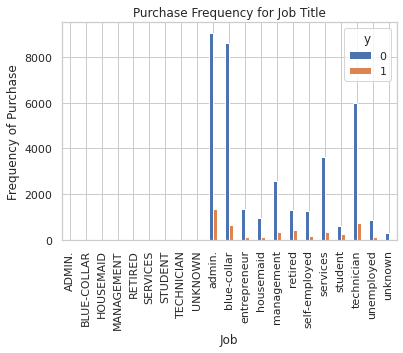

In [310]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')


The frequency of purchase of the deposit depends a great deal on the job title. Thus, job title can be a good predictor of the outcome variable.

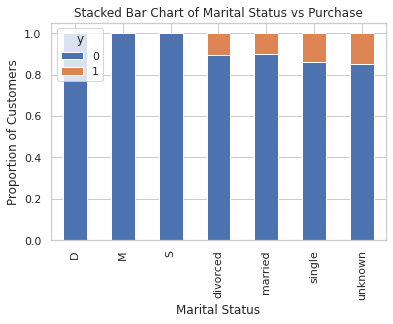

In [311]:
table=pd.crosstab(data.marital,data.y) 
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('marital_vs_pur_stack')

The marital status does not seem a strong predictor for the outcome variable

Part II : Also create stacked bars to same data columns with respect to

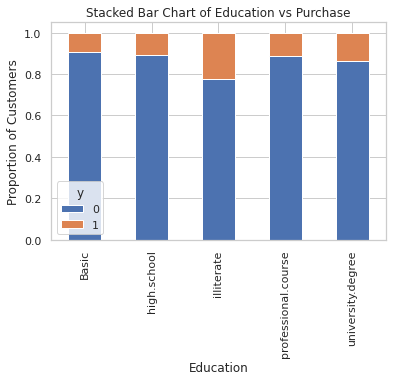

In [312]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

Education seems a good predictor of the outcome variable.

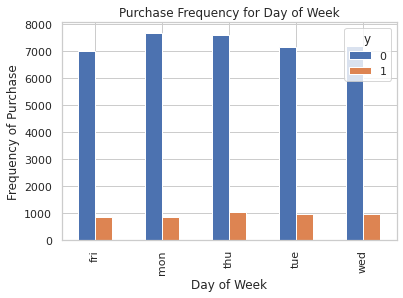

In [313]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

Day of the week may not be a good predictor of the outcome.

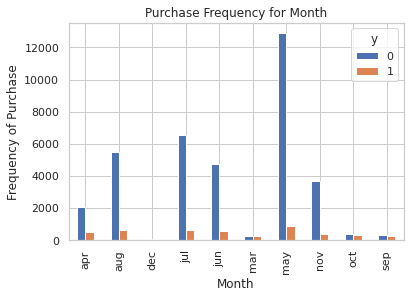

In [314]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

Month might be a good predictor of the outcome variable.

Part III : Explore the age column using a histogram and note down your observations

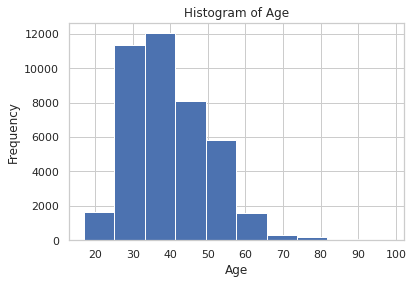

In [315]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

Most of the customers of the bank are in this dataset in the age range of 30-40.

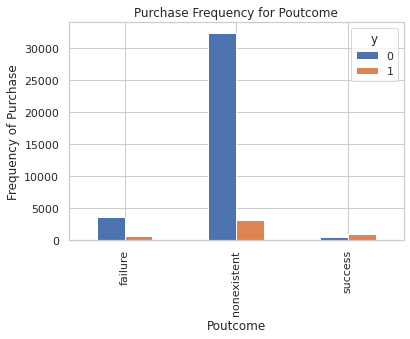

In [316]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

Section IV : Categorical Variable Encoding

In [317]:
data['education'].value_counts()

Basic                  14244
university.degree      12168
high.school             9515
professional.course     5243
illiterate                18
Name: education, dtype: int64

In [318]:
data['job'].value_counts()

admin.           10420
blue-collar       9253
technician        6742
services          3966
management        2923
retired           1717
entrepreneur      1456
self-employed     1421
housemaid         1059
unemployed        1014
student            873
unknown            329
RETIRED              3
SERVICES             3
STUDENT              2
ADMIN.               2
MANAGEMENT           1
TECHNICIAN           1
BLUE-COLLAR          1
HOUSEMAID            1
UNKNOWN              1
Name: job, dtype: int64

In [319]:
data['job'].replace(['unknown', 'UNKNOWN','RETIRED','SERVICES','STUDENT','ADMIN.','MANAGEMENT','TECHNICIAN','BLUE-COLLAR','HOUSEMAID'], ['admin.', 'admin.','retired','services','student','admin.','management','technician','blue-collar','housemaid'], inplace=True)


In [320]:
data['marital'].value_counts()

married     24923
single      11565
divorced     4608
unknown        80
M               5
D               4
S               3
Name: marital, dtype: int64

In [321]:
data['marital'].replace(['unknown','M','D','S'],['married','married','divorced','single'],inplace=True)

In [322]:
data['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [323]:
data['default'].replace(['unknown'],['no'],inplace=True)

In [324]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [325]:
data['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [326]:
data['loan'].replace(['unknown'],['no'],inplace=True)


In [327]:
data['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [328]:
data['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [329]:
#label encoding 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

data["education"]=encoder.fit_transform(data["education"])
data["job"]=encoder.fit_transform(data["job"])
data["day_of_week"]=encoder.fit_transform(data["day_of_week"])
data["month"]=encoder.fit_transform(data["month"])
data['poutcome']=encoder.fit_transform(data["poutcome"])


In [330]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  object 
 3   education       41188 non-null  int64  
 4   default         41188 non-null  object 
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

Part I : Create dummy variables for your categorial variables

part II : Explore your new dataset with these new dummy variables !

In [331]:

cat_vars = ['marital','loan','contact','default']
for var in cat_vars:

  cat_list =pd.get_dummies(data[var],drop_first= True)
  data1=pd.concat([data,cat_list],axis=1)
  
 
# cat_vars=['job','marital','education','default','housing','loan','contact', 'month', 'day_of_week','poutcome']
# data_vars=data.columns.values.tolist()
# to_keep=[i for i in data_vars if i not in cat_vars]

data = data1.drop(cat_vars,axis=1)


In [332]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   education       41188 non-null  int64  
 3   housing         41188 non-null  int64  
 4   month           41188 non-null  int64  
 5   day_of_week     41188 non-null  int64  
 6   duration        41188 non-null  int64  
 7   campaign        41188 non-null  int64  
 8   pdays           41188 non-null  float64
 9   previous        41188 non-null  int64  
 10  poutcome        41188 non-null  int64  
 11  emp_var_rate    41188 non-null  float64
 12  cons_price_idx  41188 non-null  float64
 13  cons_conf_idx   41188 non-null  float64
 14  euribor3m       41188 non-null  float64
 15  nr_employed     41188 non-null  float64
 16  y               41188 non-null  int64  
 17  yes             41188 non-null 

Section V : Preliminary Training

In [333]:
data.columns

Index(['age', 'job', 'education', 'housing', 'month', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'yes'],
      dtype='object')

In [334]:
X = data.drop('y',axis=1)
y = data['y']

In [335]:
y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

Part I : Import your Logisitc Regression libraries

In [336]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



Part II : Split your train and test dataset and train on the data

In [337]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Part III : Make note of the classification report and other metrics

In [338]:
#Predicting the test result and calculating the accuracy

y_pred = logreg.predict(X_test)

y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [339]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix =confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))


[[10711   270]
 [  828   548]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10981
           1       0.67      0.40      0.50      1376

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



Section VI : Let's Improve the performance !

Part 0 : What was your answer to Section - Part IV? Do you think class imbalance affects the model performance? Explore SMOTE implementation

Part 0 : What was your answer to Section - Part IV? Do you think class imbalance affects the model performance? Explore SMOTE implementation

Part I : Make note of the performance from the last training

Part II : Try implementing SMOTE to balance the two class labels

In [340]:


from imblearn.over_sampling import SMOTE
os = SMOTE()


os_data_X,os_data_y=os.fit_resample(X_train, y_train)
# os_data_X=pd.DataFrame(data=os_data_X,columns=columns)
# os_data_y=pd.DataFrame(data=os_data_y,columns['y'])

#We can check the numbers of our data

# print("length of oversampled data is ", len(os_dats_X))
# print("Number of no subscription in oversampled data", len(os_data_y[os_data_y[os_data_y['y==1']))
# print("Proportion of no suscription data in oversampled data is ", len(os_data_y[os_data_y['y']==0])/len(os_data_X))
# print("Proportion of no suscription data in oversampled data is ", len(os_data_y[os_data_y['y']==1])/len(os_data_X))
os_data_y.value_counts()

0    25567
1    25567
Name: y, dtype: int64

Part III : Make note of the y label data now , what are the rations now ?

We have balanced the data and now we have equal aounts of 0 and 1s for training.

Section VII : Let us Re-Train!

In [341]:
y_test.head()

15500    0
29034    0
11199    0
22247    0
27180    0
Name: y, dtype: int64

In [342]:
logreg.fit(os_data_X, os_data_y)
y_os_pred = logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [351]:

print(classification_report(y_test,y_os_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91     10981
           1       0.41      0.85      0.56      1376

    accuracy                           0.85     12357
   macro avg       0.70      0.85      0.73     12357
weighted avg       0.92      0.85      0.87     12357



Part I : Explore what RFE means

Recursive Feature Elimination(RFE) - Repeatedly construct a model and choose either the best or worst performinf feature and repeating the processwith rest of the features untill all eatures in the dataset are exhausted. RFE selects features recursively and considers smaller sets of features.

Part II : Implement your training process inside the RFE

In [358]:


from sklearn.feature_selection import RFE
rfe = RFE(logreg)
rfe = rfe.fit(os_data_X,os_data_y)

rfe.ranking_
rfe.support_



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([False, False,  True,  True,  True,  True, False,  True, False,
       False,  True, False, False,  True,  True, False, False])

Part III : What are the best columns that your RFE found? Please make a list of it

In [359]:
rfe.ranking_

array([ 8,  4,  1,  1,  1,  1,  7,  1,  9,  3,  1,  5,  2,  1,  1,  6, 10])